In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, Sequential

In [4]:
train_ds = image_dataset_from_directory(
    directory='dataset_split/train',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)

test_ds = image_dataset_from_directory(
    directory='dataset_split/test',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False,
)


Found 926 files belonging to 9 classes.
Found 237 files belonging to 9 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [6]:
base_model = MobileNetV2(    input_shape=(224,224,3),
    alpha=1.0,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    name=None,
)

In [7]:
base_model.trainable = False

In [8]:
model_tl = Sequential([

    layers.Lambda(preprocess_input),
    base_model,

    layers.GlobalAveragePooling2D(),

    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),

    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')
])


In [9]:
model_tl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                    │ ?                         │    0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ mobilenetv2_1.00_224 (Functional)  │ (None, 7, 7, 1280)        │      2,257,984 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ global_average_pooling2d           │ ?                         │              0 │
│ (GlobalAveragePooling2D)           │                           │                │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout (Dropout)                  │ ?                         │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense (Dense)                      │ ?                         │    0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ batch_normalization                │ ?                         │    0 (unbuilt) │
│ (BatchNormalization)               │                           │                │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_1 (Dropout)                │ ?                         │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_1 (Dense)                    │ ?                         │    0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ batch_normalization_1              │ ?                         │    0 (unbuilt) │
│ (BatchNormalization)               │                           │                │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_2 (Dropout)                │ ?                         │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_2 (Dense)                    │ ?                         │    0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


### Early stopping

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,              # wait 7 epochs before stopping
    restore_best_weights=True
)


In [12]:
history_tl = model_tl.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=[early_stop] # assigning early stopping
)


Epoch 1/50

29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 411ms/step - accuracy: 0.2732 - loss: 2.2866 - precision: 0.4123 - recall: 0.1371 - val_accuracy: 0.4346 - val_loss: 1.8017 - val_precision: 1.0000 - val_recall: 0.0253
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 451ms/step - accuracy: 0.5054 - loss: 1.5458 - precision: 0.7064 - recall: 0.3585 - val_accuracy: 0.6582 - val_loss: 1.3866 - val_precision: 0.9767 - val_recall: 0.1772
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 437ms/step - accuracy: 0.6253 - loss: 1.1477 - precision: 0.7975 - recall: 0.4892 - val_accuracy: 0.7257 - val_loss: 1.1207 - val_precision: 0.9135 - val_recall: 0.4008
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 439ms/step - accuracy: 0.7138 - loss: 0.9324 - precision: 0.8423 - recall: 0.5886 - val_accuracy: 0.7722 - val_loss: 0.9412 - val_precision: 0.9097 - val_recall: 0.5527
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 429ms/step - accuracy: 0.7689 - loss: 0.7868 - precision: 0.8748 - recall: 0.6717 - val_accuracy: 0.7932 - val_lo

In [13]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)


Image batch shape: (32, 224, 224, 3)


In [14]:
for images, labels in train_ds.take(1):
    print("Label batch shape:", labels.shape)


Label batch shape: (32, 9)


In [18]:
y_pred_probs = model_tl.predict(test_ds)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step


In [19]:
y_true = np.concatenate([y.numpy().argmax(axis=1) for x, y in test_ds])


In [20]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=train_ds.class_names
))


                 precision    recall  f1-score   support

           buoy       0.44      0.36      0.40        11
    cruise_ship       0.92      0.87      0.89        39
     ferry_boat       0.62      0.77      0.69        13
   freight_boat       0.00      0.00      0.00         5
        gondola       0.90      0.97      0.94        39
inflatable_boat       1.00      0.25      0.40         4
          kayak       0.80      0.88      0.84        41
     paper_boat       0.67      0.29      0.40         7
       sailboat       0.88      0.95      0.91        78

       accuracy                           0.84       237
      macro avg       0.69      0.59      0.61       237
   weighted avg       0.82      0.84      0.82       237



D:\Anaconda\envs\anaconda-ml-ai\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\anaconda-ml-ai\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Anaconda\envs\anaconda-ml-ai\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


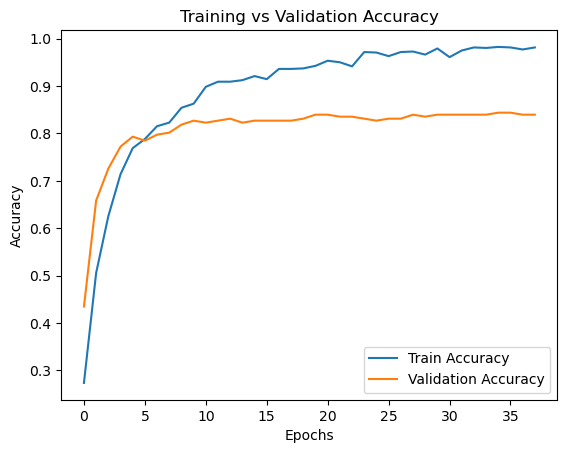

In [21]:
plt.figure()
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


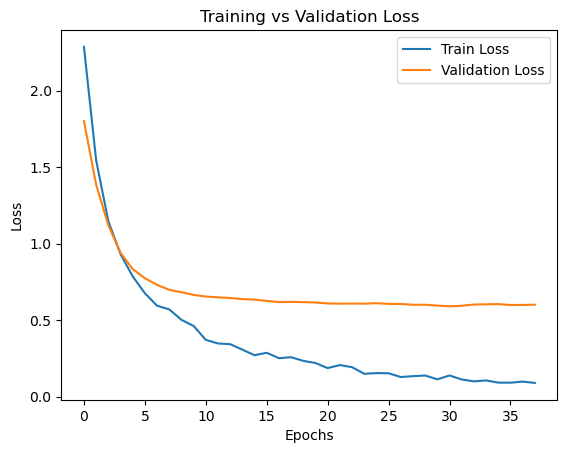

In [22]:
plt.figure()
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
